<a href="https://colab.research.google.com/github/kuan9307/Early-Diagnosis-of-Alzheimer-s-Disease-using-Deep-Learning-and-Neuroimaging/blob/main/PCA_VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive


drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/Data_reduce/'

#Folders
categories_train = ['NonDemented/train', 'MildDementia/train', 'VeryMildDementia/train']

images_train = []
labels_train = []

for category in categories_train:
  print(category)
  path = os.path.join(base_path, category)
  for img in os.listdir(path):
        #Load
        img_path = os.path.join(path, img)
        gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            #Convert to RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

        #Resize for inception
        resized_image = cv2.resize(rgb_image, (256, 256))

        images_train.append(resized_image)
        corrected_category = category.split('/')[0]
        labels_train.append(corrected_category)

Mounted at /content/drive
NonDemented/train
MildDementia/train
VeryMildDementia/train


In [ ]:
#Folders test
categories_test = ['NonDemented/test', 'MildDementia/test', 'VeryMildDementia/test']

images_test = []
labels_test = []

for category in categories_test:
  print(category)
  path = os.path.join(base_path, category)
  for img in os.listdir(path):
        #Load
        img_path = os.path.join(path, img)
        gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            #Convert to RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

        #Resize for inception
        resized_image = cv2.resize(rgb_image, (256, 256))

        images_test.append(resized_image)
        corrected_category = category.split('/')[0]
        labels_test.append(corrected_category)

NonDemented/test
MildDementia/test
VeryMildDementia/test


In [ ]:
#Folders val
categories_validation = ['NonDemented/validation', 'MildDementia/validation', 'VeryMildDementia/validation']

images_validation = []
labels_validation = []

for category in categories_validation:
  print(category)
  path = os.path.join(base_path, category)
  for img in os.listdir(path):
        #Load
        img_path = os.path.join(path, img)
        gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            #Convert to RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

        #Resize for inception
        resized_image = cv2.resize(rgb_image, (256, 256))

        images_validation.append(resized_image)
        corrected_category = category.split('/')[0]
        labels_validation.append(corrected_category)

NonDemented/validation
MildDementia/validation
VeryMildDementia/validation


In [ ]:
images_train = np.array(images_train)
labels_train = np.array(labels_train)

images_test = np.array(images_test)
labels_test = np.array(labels_test)

images_val = np.array(images_validation)
labels_val = np.array(labels_validation)

In [ ]:
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)
print(images_val.shape)
print(labels_val.shape)

(4200, 256, 256, 3)
(4200,)
(900, 256, 256, 3)
(900,)
(900, 256, 256, 3)
(900,)


In [ ]:
images_train = images_train / 255.0
images_test = images_test / 255.0
images_val = images_val / 255.0

categories = ['NonDemented', 'MildDementia', 'VeryMildDementia']
label_dict = {category: idx for idx, category in enumerate(categories)}

numeric_labels_train = [label_dict[label] for label in labels_train]
numeric_labels_test = [label_dict[label] for label in labels_test]
numeric_labels_val = [label_dict[label] for label in labels_val]

labels_train = tf.keras.utils.to_categorical(numeric_labels_train, num_classes=len(categories))
labels_test = tf.keras.utils.to_categorical(numeric_labels_test, num_classes=len(categories))
labels_val = tf.keras.utils.to_categorical(numeric_labels_val, num_classes=len(categories))

In [ ]:
# Assuming you have X_train and X_test loaded
X_train_flatten = images_train.reshape(images_train.shape[0], -1)
X_test_flatten = images_test.reshape(images_test.shape[0], -1)
X_val_flatten = images_val.reshape(images_val.shape[0], -1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)
X_val_scaled = scaler.transform(X_val_flatten)

from sklearn.decomposition import PCA

# Choose the number of components (features) you want to keep
n_components = 50  # Adjust as needed

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [ ]:
X_test_pca.shape, X_train_pca.shape, X_val_pca.shape

((900, 50), (4200, 50), (900, 50))

In [ ]:
# Assuming X_train_pca and X_test_pca are the reduced-dimensional data obtained after PCA

# Inverse transform the PCA
X_train_restored = pca.inverse_transform(X_train_pca)
X_test_restored = pca.inverse_transform(X_test_pca)
X_val_restored = pca.inverse_transform(X_val_pca)

# Assuming the original data shape is (num_samples, original_height, original_width, num_channels)
# Adjust the dimensions based on your specific dataset

original_height, original_width, num_channels = 256, 256, 3  # Adjust based on your original data shape

X_train_restored = X_train_restored.reshape((X_train_restored.shape[0], original_height, original_width, num_channels))
X_test_restored = X_test_restored.reshape((X_test_restored.shape[0], original_height, original_width, num_channels))
X_val_restored = X_val_restored.reshape((X_val_restored.shape[0], original_height, original_width, num_channels))

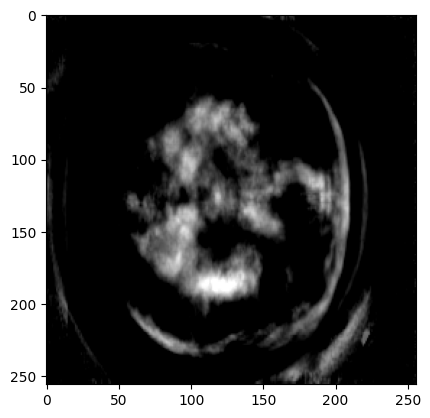

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train_restored[0])

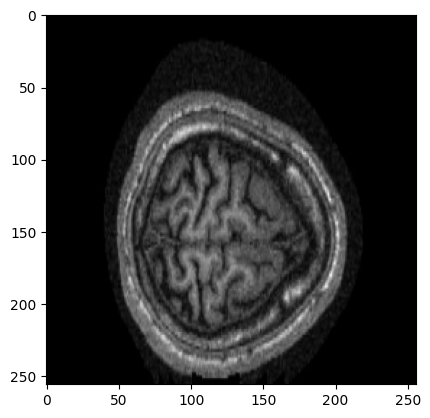

In [ ]:
plt.imshow(images_train[0])

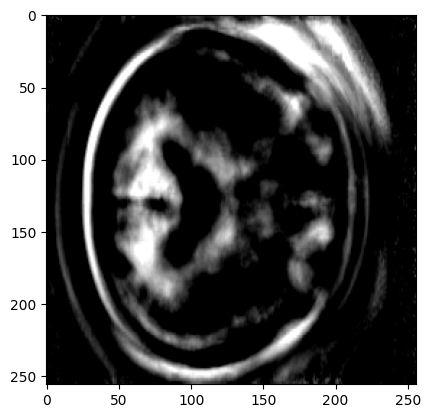

In [ ]:
plt.imshow(X_val_restored[0])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='accuracy',  # or 'val_accuracy' depending on where you want to monitor accuracy
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    mode='max',           # 'max' means training will stop when the accuracy reaches the maximum
    verbose=1             # Print a message when training is stopped
)

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

# Input shape
input_shape = (256, 256, 3)

# Import the pertrained weight of the VGG16, "include_top=False" stand for not including full connect layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freezing the weight of the VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Obtain VGG16 model's output
vgg_output = base_model.output

# Flatten the VGG16 model output
flatten_layer = Flatten()(vgg_output)

# Adding the customized full-connected layer
dense_layer = Dense(512, activation='relu')(flatten_layer)
dense_layer = Dense(512, activation='relu')(dense_layer)
dense_layer = Dense(3, activation='softmax')(dense_layer)  # 3 class

# Build the new model, integrate the VGG model with the full-connect layer
model = Model(inputs=base_model.input, outputs=dense_layer)

model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_restored, labels_train, epochs=20, batch_size=30,verbose=1,validation_data=(X_val_restored,labels_val),callbacks=[early_stopping])

Epoch 1/20
140/140 [==============================] - 40s 204ms/step - loss: 1.0946 - accuracy: 0.6174 - val_loss: 0.5618 - val_accuracy: 0.7456
Epoch 2/20
140/140 [==============================] - 28s 198ms/step - loss: 0.4448 - accuracy: 0.8060 - val_loss: 0.3996 - val_accuracy: 0.8656
Epoch 3/20
140/140 [==============================] - 29s 209ms/step - loss: 0.2519 - accuracy: 0.8986 - val_loss: 0.2593 - val_accuracy: 0.9056
Epoch 4/20
140/140 [==============================] - 31s 223ms/step - loss: 0.1871 - accuracy: 0.9281 - val_loss: 0.3400 - val_accuracy: 0.8678
Epoch 5/20
140/140 [==============================] - 31s 220ms/step - loss: 0.1384 - accuracy: 0.9438 - val_loss: 0.3295 - val_accuracy: 0.8633
Epoch 6/20
140/140 [==============================] - 30s 216ms/step - loss: 0.0688 - accuracy: 0.9733 - val_loss: 0.1815 - val_accuracy: 0.9333
Epoch 7/20
140/140 [==============================] - 31s 221ms/step - loss: 0.1803 - accuracy: 0.9250 - val_loss: 0.2526 - val_ac

In [ ]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(19)

    fig = plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validataion accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validataion loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

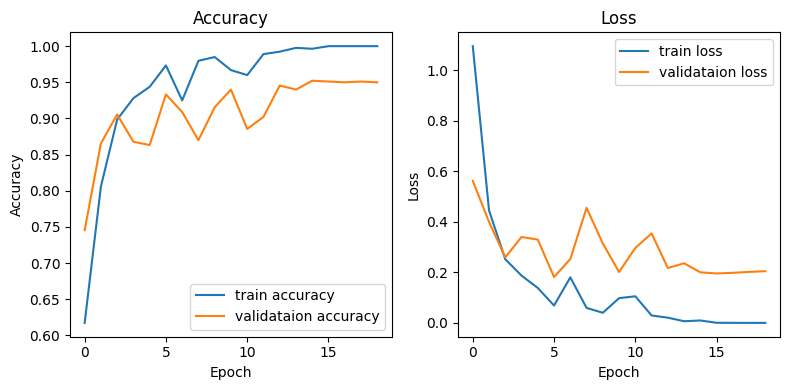

In [ ]:
# Display learning curves
display_learning_curves(history)

In [ ]:
model.evaluate(X_test_restored, labels_test)
model.save('my_model.h5')

29/29 [==============================] - 10s 209ms/step - loss: 0.1785 - accuracy: 0.9567


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(X_test_restored)

29/29 [==============================] - 5s 186ms/step


In [ ]:
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(labels_test, axis=1)
print(y_pred_classes[0])
print(y_true_classes[0])

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate F1 score, precision, recall, and other metrics
classification_rep = classification_report(y_true_classes, y_pred_classes)
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Print the results
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       300
           1       0.99      0.99      0.99       300
           2       0.94      0.95      0.95       300

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900

Confusion Matrix:
 [[279   2  19]
 [  4 296   0]
 [ 12   2 286]]


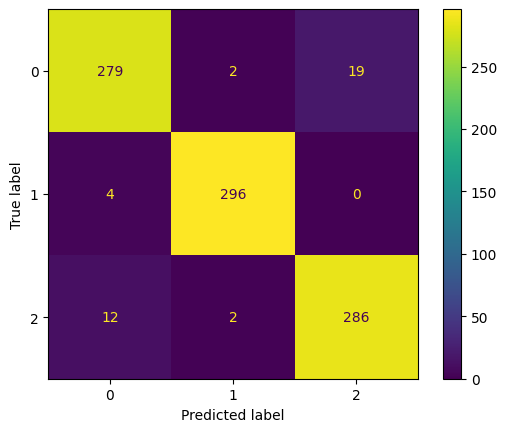

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay(confusion_matrix(y_true_classes, y_pred_classes))
disp.plot()